In [248]:
import numpy as np
import pandas as pd

In [249]:
import matplotlib.pyplot as plt 

In [250]:
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [321]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(x)

def normalize(x):
    x_min = x.min(axis=0)
    x_max = x.max(axis=0)
    x = (x - x_min) / (x_max - x_min)
    return x, x_min, x_max

def standardize(x):
    return (x - np.mean(x)) / np.std(x)

def destandardize(x, x_ref):
    return


SyntaxError: unexpected EOF while parsing (<ipython-input-321-67e2a6fd0cc6>, line 7)

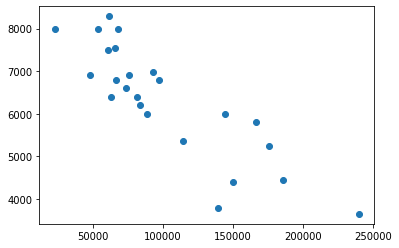

In [252]:
plt.scatter(x, y)

In [253]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(24, 1)
(24, 1)


In [254]:
X = np.hstack((x, np.ones(x.shape)))
X.shape

(24, 2)

In [255]:
X

array([[2.4000e+05, 1.0000e+00],
       [1.3980e+05, 1.0000e+00],
       [1.5050e+05, 1.0000e+00],
       [1.8553e+05, 1.0000e+00],
       [1.7600e+05, 1.0000e+00],
       [1.1480e+05, 1.0000e+00],
       [1.6680e+05, 1.0000e+00],
       [8.9000e+04, 1.0000e+00],
       [1.4450e+05, 1.0000e+00],
       [8.4000e+04, 1.0000e+00],
       [8.2029e+04, 1.0000e+00],
       [6.3060e+04, 1.0000e+00],
       [7.4000e+04, 1.0000e+00],
       [9.7500e+04, 1.0000e+00],
       [6.7000e+04, 1.0000e+00],
       [7.6025e+04, 1.0000e+00],
       [4.8235e+04, 1.0000e+00],
       [9.3000e+04, 1.0000e+00],
       [6.0949e+04, 1.0000e+00],
       [6.5674e+04, 1.0000e+00],
       [5.4000e+04, 1.0000e+00],
       [6.8500e+04, 1.0000e+00],
       [2.2899e+04, 1.0000e+00],
       [6.1789e+04, 1.0000e+00]])

In [256]:
theta = np.random.randn(2, 1)

In [257]:
theta.shape

(2, 1)

In [258]:
theta

array([[0.66872906],
       [0.67297384]])

In [259]:
def model(X, theta):
    return X.dot(theta)

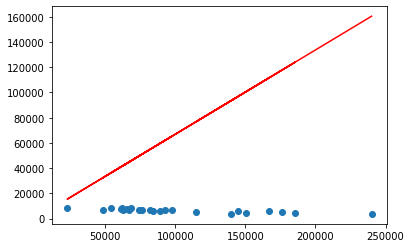

In [260]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

In [261]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)


In [262]:
cost_function(X, y, theta)

2509590885.3406677

In [263]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [264]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [318]:
learning_rate=0.00000000001
n_iterations=200
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

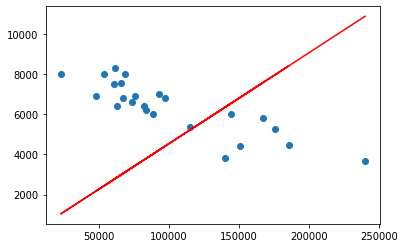

In [319]:
predictions = model(X, theta_final)
plt.scatter(x,y)
plt.plot(x, predictions, c='r')

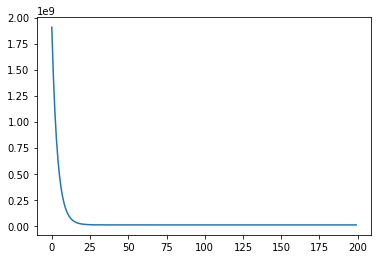

In [320]:
plt.plot(range(n_iterations), cost_history)

In [268]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [235]:
coef_determination(y, predictions)

-8.209342862537929